In [1]:
%load_ext autoreload
%autoreload 2

# Import modules
1. Builder => for building a model.
2. pandas => for managing data.
3. os => for walking into directory to get files.
4. cleaner => for cleaning data.

In [2]:
from modules.builder import Builder
import pandas as pd
import os
from modules.cleaner import Cleaner
from modules.qualityChecker import QualityChecker
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import joblib
import plotly.express as px
from sklearn.metrics import r2_score

In [3]:
for dirname, _, filenames in os.walk('/Covid-Regression-MortalityVSPopulation/datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data_path = '/usr/src/Covid-Regression-MortalityVSPopulation/datasets/covid-vaccination-vs-death_ratio.csv'
#data_path = 'C:\\Users\\Glaciiaz\\Documents\\GitHub\\MLOps-Regression-Machine-Learning-Problem\\Covid-Regression-MortalityVSPopulation\\datasets\\covid-vaccination-vs-death_ratio.csv'

In [5]:
df = pd.read_csv(data_path)

# Data Quality check

In [6]:
df

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40194523.0,1.116764
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40194523.0,1.170162
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40194523.0,1.185154
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40194523.0,1.192630
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40194523.0,1.193133
...,...,...,...,...,...,...,...,...,...,...
24174,24174,Zimbabwe,ZWE,2021-11-15,6190303.0,3484207.0,2706096.0,1,15183882.0,22.946747
24175,24175,Zimbabwe,ZWE,2021-11-16,6228119.0,3515140.0,2712979.0,0,15183882.0,23.150470
24176,24176,Zimbabwe,ZWE,2021-11-18,6310431.0,3583256.0,2727175.0,1,15183882.0,23.599077
24177,24177,Zimbabwe,ZWE,2021-11-19,6362499.0,3625221.0,2737278.0,0,15183882.0,23.875456


In [7]:
df = df.drop("Unnamed: 0", axis=1)

In [8]:
result = QualityChecker(df).get_check_result()
print(json.dumps(result, indent=4, sort_keys=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24179 entries, 0 to 24178
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  24179 non-null  object 
 1   iso_code                 24179 non-null  object 
 2   date                     24179 non-null  object 
 3   total_vaccinations       24179 non-null  float64
 4   people_vaccinated        24179 non-null  float64
 5   people_fully_vaccinated  24179 non-null  float64
 6   New_deaths               24179 non-null  int64  
 7   population               24179 non-null  float64
 8   ratio                    24179 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.7+ MB
{
    "Info": null,
    "Duplicated": 0,
    "Null": {
        "country": 0,
        "iso_code": 0,
        "date": 0,
        "total_vaccinations": 0,
        "people_vaccinated": 0,
        "people_fully_vaccinated": 0,
        "New_d

# ETL

In [9]:
data = df.copy()

In [10]:
data.loc[data['country'] == 'Thailand']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
21441,Thailand,THA,2021-03-24,102050.0,96188.0,5862.0,0,70009982.0,0.137392
21442,Thailand,THA,2021-03-30,180477.0,151413.0,29064.0,0,70009982.0,0.216273
21443,Thailand,THA,2021-04-01,204642.0,167235.0,37407.0,0,70009982.0,0.238873
21444,Thailand,THA,2021-04-02,231882.0,189666.0,42216.0,0,70009982.0,0.270913
21445,Thailand,THA,2021-04-03,244254.0,201864.0,42390.0,1,70009982.0,0.288336
...,...,...,...,...,...,...,...,...,...
21653,Thailand,THA,2021-11-15,85012905.0,45374194.0,36855732.0,45,70009982.0,64.811035
21654,Thailand,THA,2021-11-16,85412126.0,45488767.0,37114546.0,62,70009982.0,64.974687
21655,Thailand,THA,2021-11-17,86071507.0,45700036.0,37527295.0,56,70009982.0,65.276457
21656,Thailand,THA,2021-11-18,86890826.0,46005152.0,37939622.0,55,70009982.0,65.712275


In [11]:
data = Cleaner(data).drop_rows("df['country'] != 'Thailand'", reset_index=True)

In [12]:
data['country'].loc[data['population'] == data['population'].max()].head()

0    Thailand
1    Thailand
2    Thailand
3    Thailand
4    Thailand
Name: country, dtype: object

In [13]:
def add_ratio_data(df : pd.DataFrame):
    df['ratio_year'] = df.apply(lambda row: str(row.date)[0:4] + str(row.ratio), axis = 1)
    df['ratio_month'] = df.apply(lambda row: str(row.date)[5:7] + str(row.ratio), axis = 1)
    df['ratio_day'] = df.apply(lambda row: str(row.date)[8:10] + str(row.ratio), axis = 1)
    df['ratio_date'] = df.apply(lambda row: str(row.date) + str(row.ratio), axis = 1)
    return df

In [14]:
new_data = add_ratio_data(data)
new_data

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,ratio_year,ratio_month,ratio_day,ratio_date
0,21441,Thailand,THA,2021-03-24,102050.0,96188.0,5862.0,0,70009982.0,0.137392,20210.1373918364955443,030.1373918364955443,240.1373918364955443,2021-03-240.1373918364955443
1,21442,Thailand,THA,2021-03-30,180477.0,151413.0,29064.0,0,70009982.0,0.216273,20210.2162734451210115,030.2162734451210115,300.2162734451210115,2021-03-300.2162734451210115
2,21443,Thailand,THA,2021-04-01,204642.0,167235.0,37407.0,0,70009982.0,0.238873,20210.2388730795559981,040.2388730795559981,010.2388730795559981,2021-04-010.2388730795559981
3,21444,Thailand,THA,2021-04-02,231882.0,189666.0,42216.0,0,70009982.0,0.270913,20210.270912796406661,040.270912796406661,020.270912796406661,2021-04-020.270912796406661
4,21445,Thailand,THA,2021-04-03,244254.0,201864.0,42390.0,1,70009982.0,0.288336,20210.2883360261398153,040.2883360261398153,030.2883360261398153,2021-04-030.2883360261398153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,21653,Thailand,THA,2021-11-15,85012905.0,45374194.0,36855732.0,45,70009982.0,64.811035,202164.81103508925341,1164.81103508925341,1564.81103508925341,2021-11-1564.81103508925341
213,21654,Thailand,THA,2021-11-16,85412126.0,45488767.0,37114546.0,62,70009982.0,64.974687,202164.97468746671011,1164.97468746671011,1664.97468746671011,2021-11-1664.97468746671011
214,21655,Thailand,THA,2021-11-17,86071507.0,45700036.0,37527295.0,56,70009982.0,65.276457,202165.27645729147595,1165.27645729147595,1765.27645729147595,2021-11-1765.27645729147595
215,21656,Thailand,THA,2021-11-18,86890826.0,46005152.0,37939622.0,55,70009982.0,65.712275,202165.71227514385019,1165.71227514385019,1865.71227514385019,2021-11-1865.71227514385019


In [15]:
new_data['date'] = pd.to_datetime(new_data['date'])

# EDA

In [16]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,217.0,2.154900e+04,6.278668e+01,2.144100e+04,2.149500e+04,2.154900e+04,2.160300e+04,2.165700e+04
total_vaccinations,217.0,2.593460e+07,2.716000e+07,1.020500e+05,3.208882e+06,1.480512e+07,4.095302e+07,8.833095e+07
people_vaccinated,217.0,1.623652e+07,1.511136e+07,9.618800e+04,2.214721e+06,1.129258e+07,2.754074e+07,4.647300e+07
people_fully_vaccinated,217.0,9.107004e+06,1.145890e+07,5.862000e+03,9.941610e+05,3.512541e+06,1.279571e+07,3.883650e+07
New_deaths,217.0,8.462212e+01,7.877855e+01,0.000000e+00,2.700000e+01,5.700000e+01,1.190000e+02,3.120000e+02
population,217.0,7.000998e+07,0.000000e+00,7.000998e+07,7.000998e+07,7.000998e+07,7.000998e+07,7.000998e+07
ratio,217.0,2.319172e+01,2.158458e+01,1.373918e-01,3.163436e+00,1.612996e+01,3.933831e+01,6.638054e+01


In [17]:
df_country_vac = new_data.groupby('country').agg({'people_vaccinated':max}).reset_index()

In [18]:
sum_vac = df_country_vac['people_vaccinated'].sum()

In [19]:
sum_vac

46473004.0

In [20]:
df = new_data.copy()

In [21]:
df['date']

0     2021-03-24
1     2021-03-30
2     2021-04-01
3     2021-04-02
4     2021-04-03
         ...    
212   2021-11-15
213   2021-11-16
214   2021-11-17
215   2021-11-18
216   2021-11-20
Name: date, Length: 217, dtype: datetime64[ns]

In [22]:
df.sort_values(by=['date'])

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio,ratio_year,ratio_month,ratio_day,ratio_date
0,21441,Thailand,THA,2021-03-24,102050.0,96188.0,5862.0,0,70009982.0,0.137392,20210.1373918364955443,030.1373918364955443,240.1373918364955443,2021-03-240.1373918364955443
1,21442,Thailand,THA,2021-03-30,180477.0,151413.0,29064.0,0,70009982.0,0.216273,20210.2162734451210115,030.2162734451210115,300.2162734451210115,2021-03-300.2162734451210115
2,21443,Thailand,THA,2021-04-01,204642.0,167235.0,37407.0,0,70009982.0,0.238873,20210.2388730795559981,040.2388730795559981,010.2388730795559981,2021-04-010.2388730795559981
3,21444,Thailand,THA,2021-04-02,231882.0,189666.0,42216.0,0,70009982.0,0.270913,20210.270912796406661,040.270912796406661,020.270912796406661,2021-04-020.270912796406661
4,21445,Thailand,THA,2021-04-03,244254.0,201864.0,42390.0,1,70009982.0,0.288336,20210.2883360261398153,040.2883360261398153,030.2883360261398153,2021-04-030.2883360261398153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,21653,Thailand,THA,2021-11-15,85012905.0,45374194.0,36855732.0,45,70009982.0,64.811035,202164.81103508925341,1164.81103508925341,1564.81103508925341,2021-11-1564.81103508925341
213,21654,Thailand,THA,2021-11-16,85412126.0,45488767.0,37114546.0,62,70009982.0,64.974687,202164.97468746671011,1164.97468746671011,1664.97468746671011,2021-11-1664.97468746671011
214,21655,Thailand,THA,2021-11-17,86071507.0,45700036.0,37527295.0,56,70009982.0,65.276457,202165.27645729147595,1165.27645729147595,1765.27645729147595,2021-11-1765.27645729147595
215,21656,Thailand,THA,2021-11-18,86890826.0,46005152.0,37939622.0,55,70009982.0,65.712275,202165.71227514385019,1165.71227514385019,1865.71227514385019,2021-11-1865.71227514385019


Text(0.5, 1.0, 'total_vaccinations vs New_deaths')

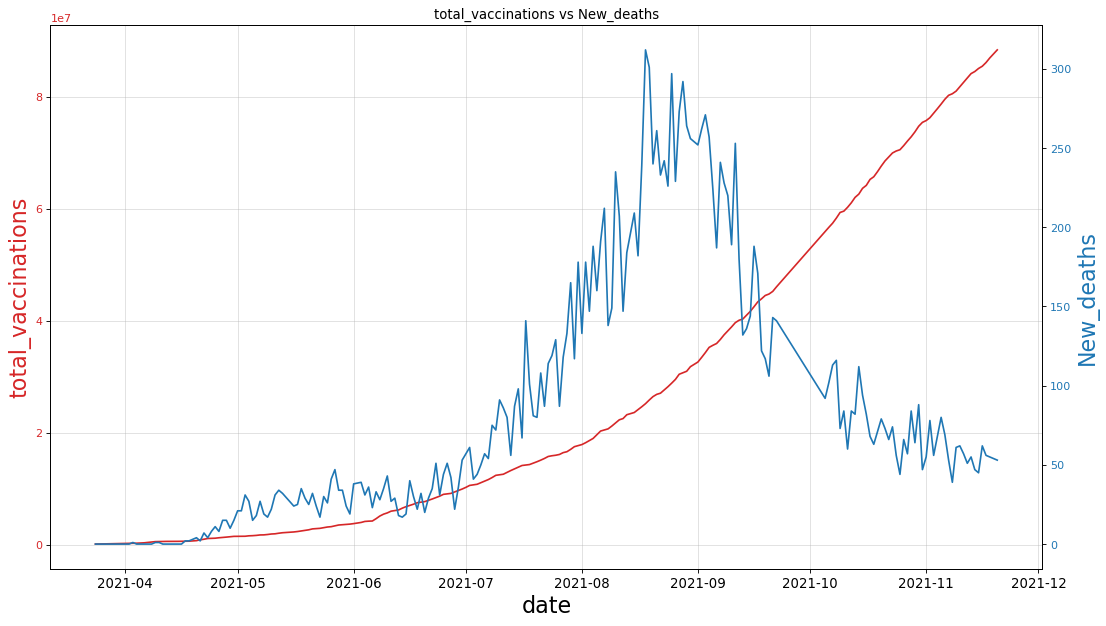

In [23]:
#preparing data
x = df['date']
y1 = df['total_vaccinations']
y2 = df['New_deaths']

#line 1
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x,y1,color='tab:red')

#line 2
ax2 = ax1.twinx()
ax2.plot(x,y2,color='tab:blue')

#decorations line 1
ax1.set_xlabel('date',fontsize=20)
ax1.tick_params(axis='x',rotation=0,labelsize=12)
ax1.set_ylabel('total_vaccinations',color='tab:red',fontsize=20)
ax1.tick_params(axis='y',rotation=0,labelcolor='tab:red')
ax1.grid(alpha=0.4)

#decorations line 2
ax2.set_ylabel('New_deaths',fontsize=20,color='tab:blue')
ax2.tick_params(axis='y',rotation=0,labelcolor='tab:blue')
#ax2.set_xticks(np.arange(0,len(x),60))#
ax2.set_title('total_vaccinations vs New_deaths')

In [24]:
#df_corr = df.corr()

In [25]:
#plt.figure(figsize=(20,15),dpi=100)
#sns.heatmap(df_corr,annot=True,square=True,vmin=-1,cmap='CMRmap',center=0.8)
#plt.yticks(rotation=90)

In [26]:
df['population']

0      70009982.0
1      70009982.0
2      70009982.0
3      70009982.0
4      70009982.0
          ...    
212    70009982.0
213    70009982.0
214    70009982.0
215    70009982.0
216    70009982.0
Name: population, Length: 217, dtype: float64

Text(0.5, 1.0, 'ratio vs New_deaths')

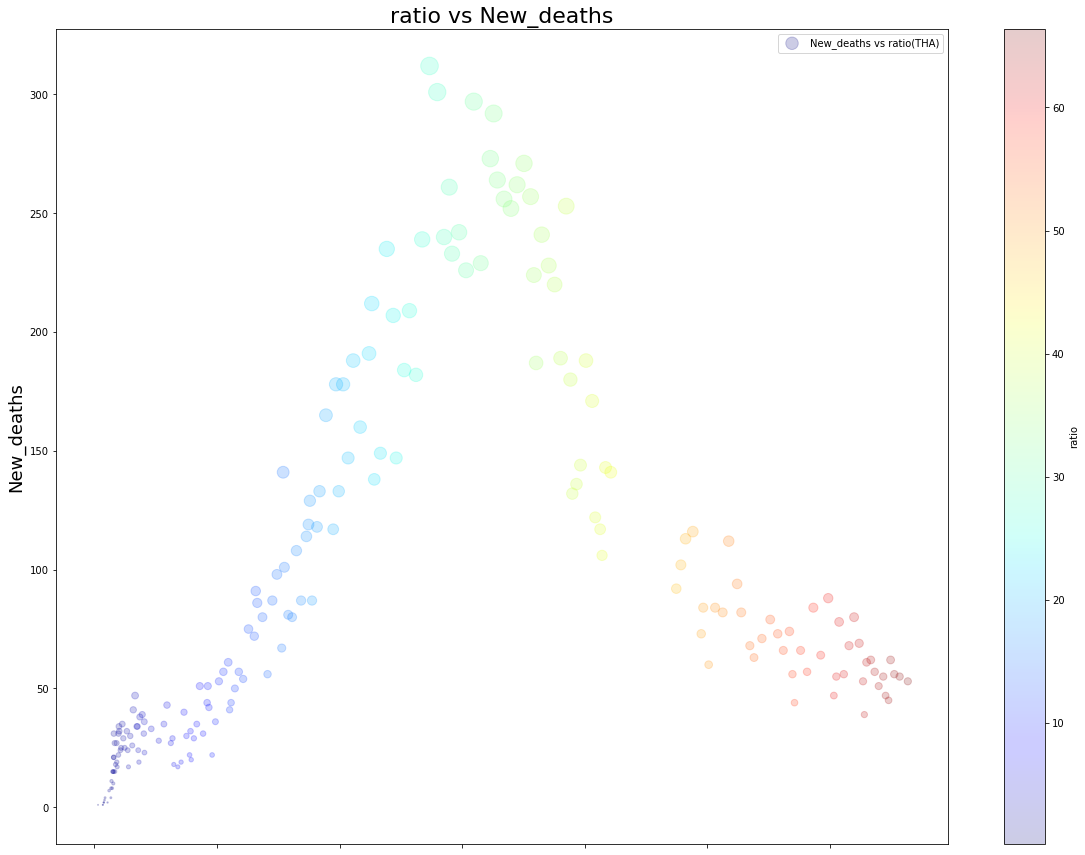

In [27]:
df.plot(
    kind='scatter',
    x='ratio',
    y='New_deaths',
    label='New_deaths vs ratio(THA)',
    alpha=0.2,
    figsize=(20,15),
    s=df['New_deaths'],
    c='ratio',
    cmap=plt.get_cmap('jet'),
    colorbar=True)

plt.xlabel('ratio(%)',fontsize=15)
plt.ylabel('New_deaths',fontsize=18)
plt.title('ratio vs New_deaths',fontsize=22)

# Model

In [28]:
# define x,y
x = df[['ratio']]
y = df[['New_deaths']]

# split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Standard Normalization(x)
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

# Standard Normalization(y)
std_y = StandardScaler()
y_train = std_y.fit_transform(y_train)
y_test = std_y.transform(y_test)

# fitting in
linear_model = Builder().build_model('LinearRegression')
linear_fit = Builder().linear_regression_fit(x_train, y_train, linear_model)

# coefficients
print ('Coefficients: ', linear_model.coef_)
print ('Intercept: ',linear_model.intercept_)

# prediction
y_pre = std_y.inverse_transform(linear_model.predict(x_test))# inverse to original value
#df['New_deaths_predicted'] = y_pre
print('The prediction of New Deaths is :\n',y_pre)

Coefficients:  [[0.40851963]]
Intercept:  [3.93811772e-17]
The prediction of New Deaths is :
 [[140.59386889]
 [144.15909759]
 [ 90.50348464]
 [122.0386145 ]
 [ 49.91039229]
 [ 74.10153806]
 [125.92023731]
 [ 59.16593685]
 [140.85644752]
 [ 91.12600114]
 [105.06295723]
 [ 51.13001399]
 [132.0228174 ]
 [ 49.69235019]
 [ 57.11756538]
 [121.38943114]
 [118.72662498]
 [ 49.96351118]
 [101.47507651]
 [ 56.50497647]
 [129.37439999]
 [ 93.12680149]
 [ 60.6897413 ]
 [ 50.87342738]
 [ 71.15676526]
 [ 96.41287707]
 [105.79116299]
 [ 49.9382855 ]
 [ 52.01808323]
 [138.14323379]
 [ 72.39790231]
 [ 53.68297841]
 [ 74.34643472]
 [133.76746704]
 [ 80.5061965 ]
 [ 82.91815779]
 [ 59.80060214]
 [ 87.90210651]
 [ 77.29412531]
 [ 68.06191894]
 [ 67.19963017]
 [127.44213758]
 [ 76.42870183]
 [ 65.5767479 ]
 [ 62.35194185]
 [ 66.56158407]
 [ 89.69492167]
 [143.47951201]
 [ 62.86336315]
 [106.76180436]
 [101.20536921]
 [ 51.50216532]
 [ 50.82529106]
 [110.37414533]
 [ 77.95090661]]


Text(0.5, 1.0, 'Linear Regression')

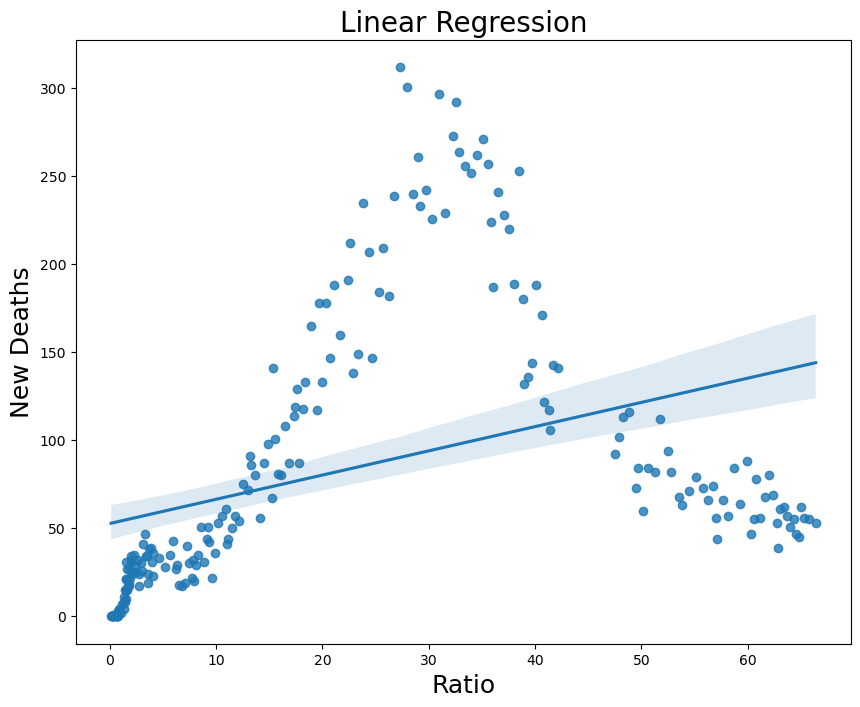

In [29]:
x = df[['ratio']]
y = df[['New_deaths']]

plt.figure(figsize=(10,8),dpi=100)
sns.regplot(x=x, y=y)
plt.xlabel('Ratio',fontsize=18)
plt.ylabel('New Deaths',fontsize=18)
plt.title('Linear Regression',fontsize=20)

#plt.scatter(df.ratio, df.New_deaths,  color='olive')
#plt.plot(x_train, linear_model.coef_[0][0]*x_train + linear_model.intercept_[0], color='red')
#plt.xlabel("Vaccination rate (%) ")
#plt.ylabel("New deaths")
#plt.show()

In [30]:
#time = df['date'].values.tolist()
#px.line(y=y_pre.cumsum())
test_x = df[['ratio']]
test_y = df[['New_deaths']]
test_y_ = linear_model.predict(test_x)
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

R2-score: -0.84


In [31]:
y_pre

array([[140.59386889],
       [144.15909759],
       [ 90.50348464],
       [122.0386145 ],
       [ 49.91039229],
       [ 74.10153806],
       [125.92023731],
       [ 59.16593685],
       [140.85644752],
       [ 91.12600114],
       [105.06295723],
       [ 51.13001399],
       [132.0228174 ],
       [ 49.69235019],
       [ 57.11756538],
       [121.38943114],
       [118.72662498],
       [ 49.96351118],
       [101.47507651],
       [ 56.50497647],
       [129.37439999],
       [ 93.12680149],
       [ 60.6897413 ],
       [ 50.87342738],
       [ 71.15676526],
       [ 96.41287707],
       [105.79116299],
       [ 49.9382855 ],
       [ 52.01808323],
       [138.14323379],
       [ 72.39790231],
       [ 53.68297841],
       [ 74.34643472],
       [133.76746704],
       [ 80.5061965 ],
       [ 82.91815779],
       [ 59.80060214],
       [ 87.90210651],
       [ 77.29412531],
       [ 68.06191894],
       [ 67.19963017],
       [127.44213758],
       [ 76.42870183],
       [ 65

# Evaluation

In [32]:
mse = mean_squared_error(std_y.inverse_transform(y_test),y_pre)

# make sure the output not show with scientific notation
def as_float(x):
    y='{:.50f}'.format(x)
    return  y

print('The Mean Squared Error(MSE) of y_pre is :',round(float(mse), 2))

The Mean Squared Error(MSE) of y_pre is : 6169.61


In [33]:
mae = mean_absolute_error(std_y.inverse_transform(y_test),y_pre)
print('The Mean Absolute Error(MAE) of y_pre is :',round(float(mae), 2))

The Mean Absolute Error(MAE) of y_pre is : 61.99


In [34]:
X_new = np.array([-2.89]).reshape(1,-1)
result = std_y.inverse_transform(linear_model.predict(X_new))
print(int(result[0][0]))

-10


# Saving models

In [35]:
joblib.dump(linear_model,"/usr/src/Covid-Regression-MortalityVSPopulation/modules/new_death_prediction.pkl")

['/usr/src/Covid-Regression-MortalityVSPopulation/modules/new_death_prediction.pkl']

In [36]:
joblib.dump(std_y, "/usr/src/Covid-Regression-MortalityVSPopulation/modules/StandardScaler_Model.pkl")

['/usr/src/Covid-Regression-MortalityVSPopulation/modules/StandardScaler_Model.pkl']